In [1]:
#Libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as mp
import seaborn as sns

In [2]:
#Loading Data
train=pd.read_csv('JanataHack_Train.csv')

In [3]:
#total number of rows and columns
train.shape

(164309, 14)

In [4]:
#Availability of Data
train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

In [5]:
#Total Number of Columns in Dataset
len(train.columns)

14

In [6]:
#Desciption about mean,max and min value
train.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [7]:
#Datatype of Columns in Pandas Data Frame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

***Exploratory Data Analysis***

In [8]:
#Missing Value Investigation
null_columns = train.columns[train.isnull().any()]
train[null_columns].isnull().sum().sort_values(ascending=False)

Months_Since_Deliquency    88379
Home_Owner                 25349
Annual_Income              25102
Length_Employed             7371
dtype: int64

In [9]:
#Filling Missing values using Mode
train['Home_Owner'] = train['Home_Owner'].fillna(train['Home_Owner'].mode()[0])

In [10]:
#Filling Missing values using Mean
train['Annual_Income']=train['Annual_Income'].fillna(train['Annual_Income'].mean())

In [11]:
#Filling Missing values using Mode
train['Length_Employed'] = train['Length_Employed'].fillna(train['Length_Employed'].mode()[0])

In [12]:
#Filling Missing values using Mode
train['Months_Since_Deliquency'] = train['Months_Since_Deliquency'].fillna(train['Months_Since_Deliquency'].mode()[0])

In [13]:
#Missing Value Investigation
null_columns = train.columns[train.isnull().any()]
train[null_columns].isnull().sum().sort_values(ascending=False)

Series([], dtype: float64)

In [14]:
#Finding Null Values in each column
train.isnull().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

In [15]:
#Checking Unique Categories
train['Interest_Rate'].unique()

array([1, 3, 2], dtype=int64)

In [16]:
#Number of Observations in Each Category
train['Interest_Rate'].value_counts()

2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

In [17]:
#Number of Unique Elements [nunique]
for col in train.columns:
    print(col, train[col].nunique())

Loan_ID 164309
Loan_Amount_Requested 1290
Length_Employed 11
Home_Owner 5
Annual_Income 12306
Income_Verified 3
Purpose_Of_Loan 14
Debt_To_Income 3953
Inquiries_Last_6Mo 9
Months_Since_Deliquency 122
Number_Open_Accounts 58
Total_Accounts 100
Gender 2
Interest_Rate 3


***Data PreProcessing***

In [18]:
#Data cleaning [Replacing , and converting into float values]
train['Loan_Amount_Requested']= train['Loan_Amount_Requested'].str.replace(',', '').astype(float)

In [19]:
#Converting Categorical into Numerical 
train['Length_Employed'] = train['Length_Employed'].replace({"< 1 year":0,"1 year":1,"1 year":1,"2 years":2,"3 years":3,"4 years":4,"5 years":5,"6 years":6,"7 years":7,"8 years":8
                                                            ,"9 years":9,"10 years":10,"10+ years":11})

In [20]:
train['Income_Verified'] = train['Income_Verified'].replace({"not verified":0,"VERIFIED - income":1,
                                                             "VERIFIED - income source":2}).astype(int)
                                                             

In [21]:
train['Home_Owner'] = train['Home_Owner'].replace({"Own":1,"Rent":2,"Mortgage":3,"Other":4,"None":5}).astype(int)

In [22]:
train['Purpose_Of_Loan'] = train['Purpose_Of_Loan'].replace({"car":0,"debt_consolidation":1,"credit_card":2,"small_business":3,
                                                            "major_purchase":4,"home_improvement":5,"other":6,"medical":7,
                                                            "moving":8,"wedding":9,"vacation":10,"educational":11,"renewable_energy":12
                                                             ,"house":13}).astype(int)

In [23]:
#Dropping column
train=train.drop(columns=['Loan_ID'])

In [24]:
#Chi Square Test [Categorical Independent Variable and Categorical Dependent Variable]
from scipy import stats
def fun(a,b):
    cross_tab=pd.crosstab(a,b)
    print(cross_tab)
    c=stats.chi2_contingency(cross_tab)
    print(c)
    
str1=train['Gender']
str2=train['Interest_Rate']
fun(str1,str2)    

Interest_Rate      1      2      3
Gender                            
Female          9669  20415  17049
Male           24137  50165  42874
(3.6933695301274088, 0.15775930949610473, 2, array([[ 9697.44930588, 20246.28681326, 17189.26388086],
       [24108.55069412, 50333.71318674, 42733.73611914]]))


In [25]:
#Dropping column
train=train.drop(columns=['Gender'])

In [26]:
#Checking for Duplicate Rows
duplicate_rows=train[train.duplicated()]
print(duplicate_rows.shape)

(0, 12)


In [27]:
#Correlation
corr = train.corr(method='pearson')

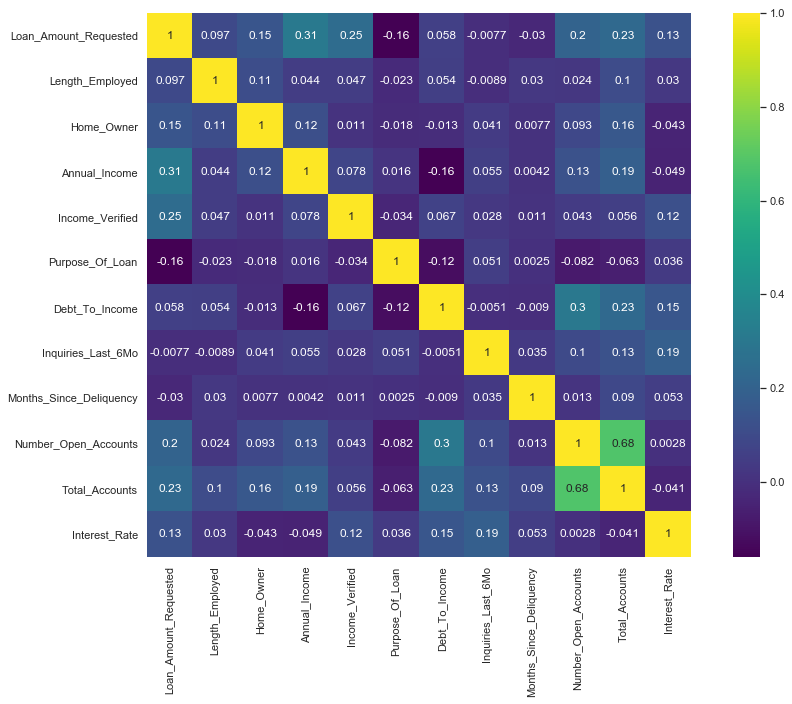

In [28]:
#Heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr, square=True, annot=True, cmap='viridis')

In [29]:
#Dropping Two highly Corelated Variables
train=train.drop(columns=['Number_Open_Accounts'])

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_Amount_Requested    164309 non-null  float64
 1   Length_Employed          164309 non-null  int64  
 2   Home_Owner               164309 non-null  int32  
 3   Annual_Income            164309 non-null  float64
 4   Income_Verified          164309 non-null  int32  
 5   Purpose_Of_Loan          164309 non-null  int32  
 6   Debt_To_Income           164309 non-null  float64
 7   Inquiries_Last_6Mo       164309 non-null  int64  
 8   Months_Since_Deliquency  164309 non-null  float64
 9   Total_Accounts           164309 non-null  int64  
 10  Interest_Rate            164309 non-null  int64  
dtypes: float64(4), int32(3), int64(4)
memory usage: 11.9 MB


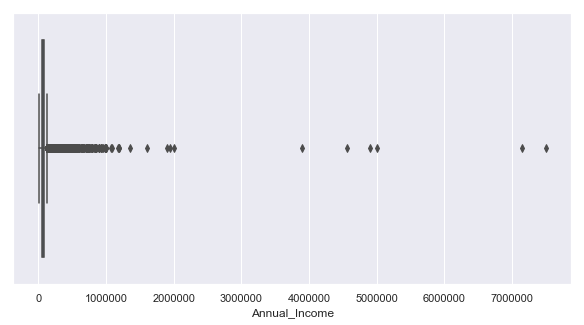

In [31]:
#BoxPlot
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=train['Annual_Income'])


In [32]:
import statistics
def fun(a): 
    mean=statistics.mean(train['Annual_Income'])
    stdev=statistics.stdev(train['Annual_Income'])
    for i in a:
        z_score=(i-mean)/stdev
        if(z_score>3 or z_score<-3):
            print(i)
        
    
fun(train['Annual_Income']);


400000.0
350000.0
265000.0
550000.0
357000.0
250000.0
300000.0
320000.0
350000.0
275000.0
333000.0
250000.0
285000.0
472000.0
275000.0
410000.0
850000.0
300000.0
244000.0
250000.0
261000.0
250000.0
392200.0
350000.0
250000.0
390000.0
325000.0
250000.0
250000.0
920000.0
390000.0
560000.0
350000.0
290000.0
300000.0
334000.0
255000.0
354000.0
416000.0
270000.0
275000.0
250000.0
265000.0
245000.0
550000.0
286000.0
250000.0
325000.0
317000.0
250000.0
269000.0
280000.0
300000.0
350000.0
500000.0
1950000.0
250000.0
700000.0
350000.0
276000.0
250000.0
932000.0
500000.0
345000.0
375000.0
999999.0
400000.0
290000.0
250000.0
343000.0
850000.0
420000.0
272000.0
420000.0
250000.0
400000.0
275000.0
410000.0
550000.0
300000.0
300000.0
250000.0
265000.0
600000.0
400000.0
260000.0
280000.0
260000.0
280000.0
250000.0
250000.0
450000.0
250000.0
300000.0
250000.0
300000.0
290000.0
289000.0
300000.0
250000.0
300000.0
300000.0
300000.0
250000.0
280000.0
260000.0
700000.0
275000.0
280000.0
435000.0
800000.0


260000.0
300000.0
625000.0
350000.0
250000.0
750000.0
425000.0
275000.0
424000.0
248000.0
250000.0
280000.0
500000.0
260000.0
411996.0
283000.0
280000.0
250000.0
250000.0
4900000.0
897000.0
350000.0
360000.0
800000.0
250000.0
250000.0
250000.0
252000.0
247000.0
260000.0
500000.0
340000.0
300000.0
250000.0
320000.0
290000.0
300000.0
530305.0
260000.0
300000.0
340000.0
290000.0
260000.0
250000.0
300000.0
545000.0
290000.0
250000.0
322000.0
300000.0
310000.0
500000.0
260000.0
300000.0
400000.0
576000.0
250000.0
280000.0
345000.0
315000.0


In [33]:
#Removing Outliers
from scipy import stats
z=np.abs(stats.zscore(train['Annual_Income']))
print(z)
threshold=3
print(np.where(z>3))
train = train[(z<3)]
train

[9.59286329e-02 2.61846480e-16 4.02208140e-02 ... 2.61846480e-16
 2.61846480e-16 2.61846480e-16]
(array([    98,    177,    356, ..., 164044, 164101, 164112], dtype=int32),)


,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Total_Accounts,Interest_Rate
0,7000.0,0,2,68000.000000,0,0,18.37,0,9.0,14,1
1,30000.0,4,3,73331.159434,1,1,14.93,0,17.0,24,3
2,24725.0,7,3,75566.400000,2,1,15.88,0,9.0,16,3
3,16000.0,0,3,56160.000000,2,1,14.34,3,9.0,22,3
4,17000.0,8,1,96000.000000,2,1,22.17,1,9.0,30,1
...,...,...,...,...,...,...,...,...,...,...,...
164304,20725.0,11,2,73331.159434,2,2,13.56,0,9.0,16,2
164305,6000.0,8,1,73331.159434,2,3,9.12,0,36.0,30,2
164306,20250.0,11,3,73331.159434,1,2,18.17,1,9.0,30,1
164307,10000.0,4,2,73331.159434,0,4,18.75,1,48.0,62,3


***Feature Engineering***

In [34]:
from sklearn.ensemble import RandomForestClassifier
features = [['Loan_Amount_Requested','Length_Employed','Home_Owner','Annual_Income','Income_Verified','Purpose_Of_Loan',
            'Debt_To_Income','Inquiries_Last_6Mo','Months_Since_Deliquency','Total_Accounts']]
target = [['Interest_Rate']]
# Separating out the features
x = train [['Loan_Amount_Requested','Length_Employed','Home_Owner','Annual_Income','Income_Verified','Purpose_Of_Loan',
            'Debt_To_Income','Inquiries_Last_6Mo','Months_Since_Deliquency','Total_Accounts']]
# Separating out the target
y = train[['Interest_Rate']]
# define the model
model = RandomForestClassifier(random_state=10)
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


c:\users\vishanthsurresh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Feature: 0, Score: 0.16487
Feature: 1, Score: 0.09163
Feature: 2, Score: 0.03320
Feature: 3, Score: 0.16136
Feature: 4, Score: 0.02986
Feature: 5, Score: 0.04475
Feature: 6, Score: 0.20430
Feature: 7, Score: 0.03424
Feature: 8, Score: 0.08653
Feature: 9, Score: 0.14926


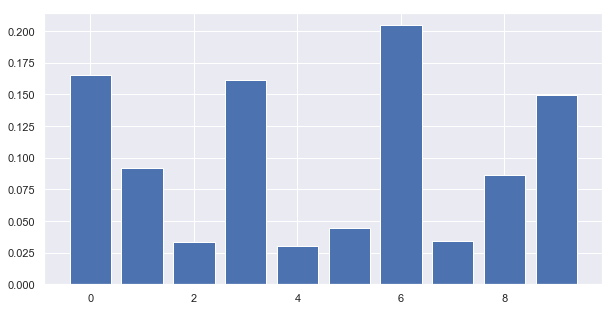

In [35]:
# plot feature importance
mp.bar([x for x in range(len(importance))], importance)
mp.show()

In [36]:
#Dropping columns
#train=train.drop(columns=['Income_Verified','Inquiries_Last_6Mo'])

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162936 entries, 0 to 164308
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_Amount_Requested    162936 non-null  float64
 1   Length_Employed          162936 non-null  int64  
 2   Home_Owner               162936 non-null  int32  
 3   Annual_Income            162936 non-null  float64
 4   Income_Verified          162936 non-null  int32  
 5   Purpose_Of_Loan          162936 non-null  int32  
 6   Debt_To_Income           162936 non-null  float64
 7   Inquiries_Last_6Mo       162936 non-null  int64  
 8   Months_Since_Deliquency  162936 non-null  float64
 9   Total_Accounts           162936 non-null  int64  
 10  Interest_Rate            162936 non-null  int64  
dtypes: float64(4), int32(3), int64(4)
memory usage: 13.1 MB


***Random Forest Classification***

In [38]:
#RF Classificaiton Modelling
#Independent Variables
x=train.iloc[:,0:10]
#Dependent Variable
y=train.iloc[:,10]
#Train and Test Split 
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, random_state=42)
print("Train x shape: ", train_x.shape)
print("Test x shape: ", test_x.shape)
print("Train y shape: ", train_y.shape)
print("Test y shape: ", test_y.shape)

Train x shape:  (114055, 10)
Test x shape:  (48881, 10)
Train y shape:  (114055,)
Test y shape:  (48881,)


***Model***

In [39]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=100,oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=30)
rfm.fit(train_x,train_y)
ypred=rfm.predict(test_x)

In [40]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
#from scipy.stats import uniform
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import RandomizedSearchCV
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(train_x.astype(np.float32))
#X_test_scaled = scaler.transform(test_x.astype(np.float32))
#logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)
#distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
#lin_clf = RandomizedSearchCV(logistic,distributions,random_state=42)
#lin_clf.fit(X_train_scaled, train_y)
#y_pred = lin_clf.predict(X_train_scaled)
#accuracy_score(train_y, y_pred)


***Accuracy, Precision and Recall***

In [41]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y, ypred))


Accuracy: 0.5251733802499949


***Confusion Matrix***

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, ypred)
cm

array([[ 2234,  6197,  1511],
       [ 1608, 13359,  5989],
       [  409,  7496, 10078]], dtype=int64)

***Classification Report***

In [43]:
from sklearn.metrics import classification_report
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           1       0.53      0.22      0.31      9942
           2       0.49      0.64      0.56     20956
           3       0.57      0.56      0.57     17983

    accuracy                           0.53     48881
   macro avg       0.53      0.47      0.48     48881
weighted avg       0.53      0.53      0.51     48881



In [44]:
#print("Before OverSampling, counts of label '1': {}".format(sum(train_y == 1))) 
#print("Before OverSampling, counts of label '2': {} \n".format(sum(train_y == 2))) 
#print("Before OverSampling, counts of label '3': {} \n".format(sum(train_y == 3)))
  
#import SMOTE module from imblearn library 
#pip install imblearn (if you don't have imblearn in your system) 
#from imblearn.over_sampling import SMOTE 
#sm = SMOTE(random_state = 2) 
#X_train_res, y_train_res = sm.fit_sample(train_x, train_y.ravel()) 
  
#print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
#print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
#print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
#print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2))) 
#print("After OverSampling, counts of label '3': {}".format(sum(y_train_res == 3))) 

In [45]:
#Random Forest Classification
#from sklearn.ensemble import RandomForestClassifier
#rfm = RandomForestClassifier(n_estimators=100,oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=30)
#rfm.fit(X_train_res,y_train_res.ravel())
#ypred=rfm.predict(test_x)

In [46]:
#from sklearn.metrics import classification_report
#print(classification_report(test_y,ypred))

***Test Data***

In [47]:
#Loading Data
test=pd.read_csv('JanataHack_Test.csv')
test_loan = test['Loan_ID']

In [48]:
#Dropping Columns
test=test.drop(columns=['Gender','Number_Open_Accounts','Loan_ID'])

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_Amount_Requested    109541 non-null  object 
 1   Length_Employed          104605 non-null  object 
 2   Home_Owner               92830 non-null   object 
 3   Annual_Income            92643 non-null   float64
 4   Income_Verified          109541 non-null  object 
 5   Purpose_Of_Loan          109541 non-null  object 
 6   Debt_To_Income           109541 non-null  float64
 7   Inquiries_Last_6Mo       109541 non-null  int64  
 8   Months_Since_Deliquency  50682 non-null   float64
 9   Total_Accounts           109541 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 6.3+ MB


In [50]:
#Filling Missing values using Mode
test['Annual_Income'] = test['Annual_Income'].fillna(test['Annual_Income'].mode()[0])

In [51]:
#Filling Missing values using Mode

test['Months_Since_Deliquency'] = test['Months_Since_Deliquency'].fillna(test['Months_Since_Deliquency'].mode()[0])

In [52]:
#Filling Missing values using Mode
#Converting Categorical into Numerical 
test['Length_Employed'] = test['Length_Employed'].replace({"< 1 year":0,"1 year":1,"1 year":1,"2 years":2,"3 years":3,"4 years":4,"5 years":5,"6 years":6,"7 years":7,"8 years":8
                                                            ,"9 years":9,"10 years":10,"10+ years":11})
test['Length_Employed'] = test['Length_Employed'].fillna(test['Length_Employed'].mode()[0])

In [53]:
#Filling Missing values using Mode
test['Home_Owner'] = test['Home_Owner'].fillna(test['Home_Owner'].mode()[0])
test['Home_Owner'] = test['Home_Owner'].replace({"Own":1,"Rent":2,"Mortgage":3,"Other":4,"None":5}).astype(int)

In [54]:
test['Purpose_Of_Loan'] = test['Purpose_Of_Loan'].replace({"car":0,"debt_consolidation":1,"credit_card":2,"small_business":3,
                                                            "major_purchase":4,"home_improvement":5,"other":6,"medical":7,
                                                            "moving":8,"wedding":9,"vacation":10,"educational":11,"renewable_energy":12
                                                             ,"house":13}).astype(int)

In [55]:
test['Income_Verified'] = test['Income_Verified'].replace({"not verified":0,"VERIFIED - income":1,
                                                             "VERIFIED - income source":2}).astype(int)
                                                             

In [56]:
#Data cleaning [Replacing , and converting into float values]
test['Loan_Amount_Requested']= test['Loan_Amount_Requested'].str.replace(',', '').astype(float)

In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_Amount_Requested    109541 non-null  float64
 1   Length_Employed          109541 non-null  float64
 2   Home_Owner               109541 non-null  int32  
 3   Annual_Income            109541 non-null  float64
 4   Income_Verified          109541 non-null  int32  
 5   Purpose_Of_Loan          109541 non-null  int32  
 6   Debt_To_Income           109541 non-null  float64
 7   Inquiries_Last_6Mo       109541 non-null  int64  
 8   Months_Since_Deliquency  109541 non-null  float64
 9   Total_Accounts           109541 non-null  int64  
dtypes: float64(5), int32(3), int64(2)
memory usage: 7.1 MB


In [58]:
y_pred_test = rfm.predict(test)

In [59]:
type(y_pred_test)

numpy.ndarray

In [60]:
type(test_loan)

pandas.core.series.Series

In [62]:
#Writing into CSV File
result = pd.DataFrame({"Loan_ID":test_loan,"Interest_Rate":y_pred_test})
result.head()
result.to_csv('JanataHack_Output.csv')